In [1]:
import matplotlib.pyplot as plt
from vega_datasets import data

In [2]:
iris = data('iris')
iris.head()

,petalLength,petalWidth,sepalLength,sepalWidth,species
0,1.4,0.2,5.1,3.5,setosa
1,1.4,0.2,4.9,3.0,setosa
2,1.3,0.2,4.7,3.2,setosa
3,1.5,0.2,4.6,3.1,setosa
4,1.4,0.2,5.0,3.6,setosa


## Scatterplot in Matplotlib

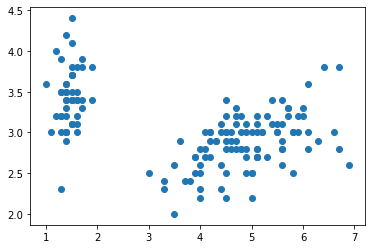

In [3]:
plt.scatter(iris.petalLength, iris.sepalWidth)

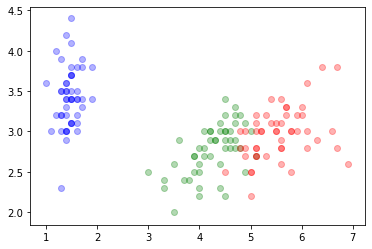

In [4]:
# Need to manually specify color map 
color_map =  dict(zip(iris.species.unique(), ['blue', 'green', 'red']))

# Adding color involves for loop and groupby
for species, group in iris.groupby('species'):
    plt.scatter(group.petalLength, group.sepalWidth,
                color=color_map[species], label=species, alpha=0.3)


Text(0, 0.5, 'sepalLength')

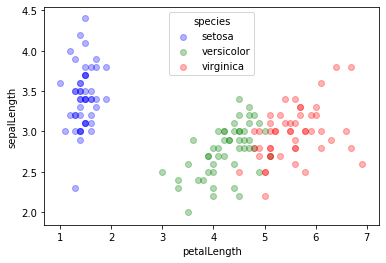

In [5]:
# Need to manually specify color map 
color_map =  dict(zip(iris.species.unique(), ['blue', 'green', 'red']))

# Adding color involves for loop and groupby
for species, group in iris.groupby('species'):
    plt.scatter(group.petalLength, group.sepalWidth,
                color=color_map[species], label=species, alpha=0.3)

# Need to manually add legend and field titles
plt.legend(frameon=True, title='species')
plt.xlabel('petalLength')
plt.ylabel('sepalLength')

## Add Faceting

With facting, we are separating the different groups in separate charts.

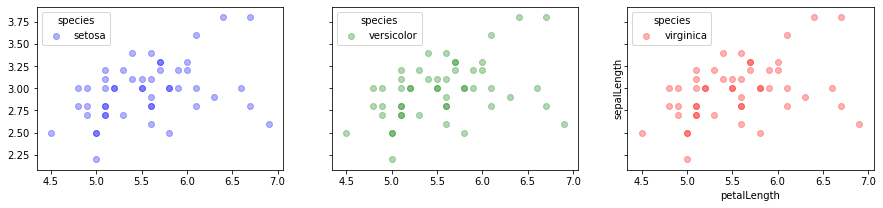

In [6]:
n_panels = len(color_map)

fig, ax = plt.subplots(1, n_panels, figsize=(n_panels * 5, 3),
                       sharex=True, sharey=True)

for i, (species, grouo) in enumerate(iris.groupby('species')):
    ax[i].scatter(group.petalLength, group.sepalWidth,
                color=color_map[species], label=species, alpha=0.3)
    ax[i].legend(frameon=True, title='species')
    
plt.xlabel('petalLength')
plt.ylabel('sepalLength');

## Altair

Now let's do the same with Altair. We will first make a scatterplot and then add faceting. 

In [7]:
import altair as alt

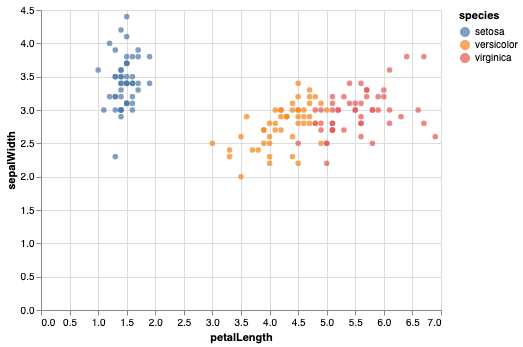

In [8]:
alt.Chart(iris).mark_circle().encode(
    x='petalLength',
    y='sepalWidth',
    color='species'
)

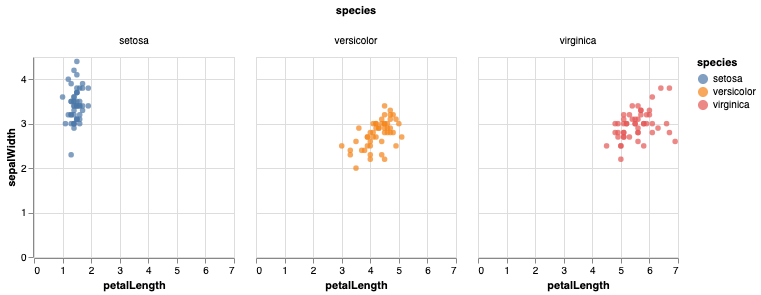

In [9]:
alt.Chart(iris).mark_circle().encode(
    x='petalLength',
    y='sepalWidth',
    color='species',
    column='species'
).properties(width=200, height=200)